# Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# References

1) In class material
2) https://towardsdatascience.com/building-a-facial-recognition-model-using-pca-svm-algorithms-c81d870add16
3) https://www.turcomat.org/index.php/turkbilmat/article/download/2731/2333/5149

# Data Loading

In [ ]:
import os
import numpy as np
import pandas as pd
import glob
import tensorflow as tf
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
os.chdir('/content/drive/MyDrive/LablFiles/AdvancedVision/Project2/Files/')

In [ ]:
!ls

'Dataset Aligned Face Dataset from Pinterest.zip'   video1.mp4
 vgg_face_weights.h5				    video2.mp4


In [ ]:
!rm pins

rm: cannot remove 'pins': Is a directory


In [ ]:
!pwd

/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files


In [ ]:
cd '/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS'

/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS


In [ ]:
!pwd

/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS


In [ ]:
lstdir = os.listdir('/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS')

In [ ]:
dfFiles = pd.DataFrame(columns={'filepath','folder','Number'})

In [ ]:
dirno=0
for dir in lstdir :
  files = glob.glob(dir + '/*.jpg')
  if len(files) > 0 :
    dirno = dirno +1
    for fi in files :
      dfFiles = dfFiles.append({'filepath':os.path.join('/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS',fi),
                                'folder':dir,
                                'Number':dirno}, ignore_index=True)          


In [ ]:
dfFiles['Number'] = dfFiles['Number'].astype(int)

In [ ]:
np.unique(dfFiles['Number'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

Observations
- There are 100 celebrities and for each celebrities many pictures

# Data Processing

In [ ]:
dfFiles.sample(10)

,filepath,Number,folder
5154,/content/drive/My Drive/LablFiles/AdvancedVisi...,50,pins_Robin Taylor
7857,/content/drive/My Drive/LablFiles/AdvancedVisi...,73,pins_david mazouz
9779,/content/drive/My Drive/LablFiles/AdvancedVisi...,90,pins_miguel herran
535,/content/drive/My Drive/LablFiles/AdvancedVisi...,6,pins_Benedict Cumberbatch
9589,/content/drive/My Drive/LablFiles/AdvancedVisi...,87,pins_margot robbie face
4871,/content/drive/My Drive/LablFiles/AdvancedVisi...,47,pins_RJ Mitte
7855,/content/drive/My Drive/LablFiles/AdvancedVisi...,73,pins_david mazouz
2976,/content/drive/My Drive/LablFiles/AdvancedVisi...,28,pins_Jesse Eisenberg
883,/content/drive/My Drive/LablFiles/AdvancedVisi...,10,pins_Bryan Cranston
7901,/content/drive/My Drive/LablFiles/AdvancedVisi...,73,pins_david mazouz


Lets prepare list of genuine and forged pictures from the above dataset
- Genuine : Consider any celebrity (folder) and its picture as genuine. 
- Forged :  The forged picture can be taken as picture of any other celebrity  

In [ ]:
def GenForgedNum(num) :
  #Input : num - The celebrity number...genuine...for forged get any other numder than this one
  n=0
  flag = True
  while flag == True :
    n = np.random.randint(1,100,1)
    if (n != num) :
      flag=False
  return n[0]

In [ ]:
def GetCelebrityNum(num) :
  return dfFiles[dfFiles['Number']==num]['folder'][0:1].item()

In [ ]:
dfFiles[dfFiles['Number']==20]['folder'][0:1].item()

'pins_Dwayne Johnson'

In [ ]:
dfFiles['Forged'] = dfFiles['Number'].apply(GenForgedNum)

In [ ]:
dfFiles['Forgedfolder'] = dfFiles['Forged'].apply(GetCelebrityNum)

In [ ]:
dfFiles.sample(10)

,filepath,Number,folder,Forged,Forgedfolder
2744,/content/drive/My Drive/LablFiles/AdvancedVisi...,26,pins_Jason Momoa,95,pins_selena gomez
6679,/content/drive/My Drive/LablFiles/AdvancedVisi...,64,pins_alexandra daddario,58,pins_Thomas Middleditch
5008,/content/drive/My Drive/LablFiles/AdvancedVisi...,48,pins_Rami Melek,27,pins_Jeremy Renner
5191,/content/drive/My Drive/LablFiles/AdvancedVisi...,50,pins_Robin Taylor,90,pins_miguel herran
5386,/content/drive/My Drive/LablFiles/AdvancedVisi...,52,pins_Sarah Wayne Callies,89,pins_mark zuckerberg
9963,/content/drive/My Drive/LablFiles/AdvancedVisi...,92,pins_rihanna,83,pins_jeff bezos
5176,/content/drive/My Drive/LablFiles/AdvancedVisi...,50,pins_Robin Taylor,73,pins_david mazouz
10190,/content/drive/My Drive/LablFiles/AdvancedVisi...,94,pins_sean pertwee,30,pins_Jon Bernthal
5576,/content/drive/My Drive/LablFiles/AdvancedVisi...,54,pins_Sebastian Stan,47,pins_RJ Mitte
9449,/content/drive/My Drive/LablFiles/AdvancedVisi...,86,pins_lindsey morgan face,91,pins_millie bobby brown


In [ ]:
dfFiles.to_pickle('/content/drive/My Drive/LablFiles/AdvancedVision/Project2/dffiles.pickle')

In [ ]:
dfFiles = pd.read_pickle('/content/drive/My Drive/LablFiles/AdvancedVision/Project2/dffiles.pickle')

In [ ]:
basepath ='/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS'

In [ ]:
#Start with empty list of original and fake pictures
genuine_pict = [[] for i in range(100)]
forged_pict = [[] for i in range(100)]

In [ ]:
for index, row in dfFiles.iterrows() :
  num = int(row['Number'])
  genuinefol = row['folder']          #Folder with a given Celebrity 
  forgedfol  = row['Forgedfolder']     #Folder for pictures of some other Celebrity
  fpath = row['filepath']

  #select any random file from other celebrity's folder
  files = glob.glob(basepath+ '/' + forgedfol + '/*.jpg')
  n = np.random.randint(1,len(files),1)
  forgedfile = files[n[0]]
  if (len(fpath) >0 and len(forgedfile) >0) :
    lst1 = genuine_pict[num-1] # first get the list
    lst1.append(fpath)
    genuine_pict[num-1]=lst1
    #genuine_pict[num-1].append(fpath)
    
    lst2= forged_pict[num-1] # first get the lsit
    lst2.append(forgedfile)
    #forged_pict[num-1].append(forgedfile)
    forged_pict[num-1]=lst2

In [ ]:
len(genuine_pict)

100

In [ ]:
len(forged_pict)

100

In [ ]:
len(genuine_pict[0])

86

In [ ]:
len(forged_pict[0])

86

In [ ]:
genuine_pict[0][0]

'/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS/pins_Aaron Paul/Aaron Paul164_276.jpg'

In [ ]:
forged_pict[0][0]

'/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS/pins_Martin Starr/Martin Starr45.jpg'

In [ ]:
# some random testing
ls1 = genuine_pict[22]
ls2 = forged_pict[22]

In [ ]:
print(type(ls1),type(ls2),len(ls1),len(ls2))

<class 'list'> <class 'list'> 128 128


In [ ]:
def DisplayPicture():
    """
    1. Randomly select a picture 
    2. Show two genuine picture of the celebrity
    3. Show one forged picture i.e. picture of other celebrity
    """
  
    #Select randomly any celebrity number
    person_id = np.random.randint(0, len(genuine_pict))

    #Read 2 genuine celebrity pictures randomly
    genuine1, genuine2 = np.random.randint(0, len(genuine_pict[person_id]), 2)  
    original_img = tf.keras.preprocessing.image.load_img(genuine_pict[person_id][genuine1])
    genuine_img = tf.keras.preprocessing.image.load_img(genuine_pict[person_id][genuine2])

    #Read 1 forged celebtiry picture 
    forged1 = np.random.randint(0, len(forged_pict[person_id]))
    forged_img = tf.keras.preprocessing.image.load_img(forged_pict[person_id][forged1])

    #Display pictures    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))

    ax1.set_title('Genuine Picture')
    ax1.imshow(original_img, cmap = 'gray')
    ax1.axis('off')

    ax2.set_title('Genuine Picture')
    ax2.imshow(genuine_img, cmap = 'gray')
    ax2.axis('off')

    ax3.set_title('Forged Picture')
    ax3.imshow(forged_img, cmap = 'gray')
    ax3.axis('off')

    plt.show()

# Check Some sample data 

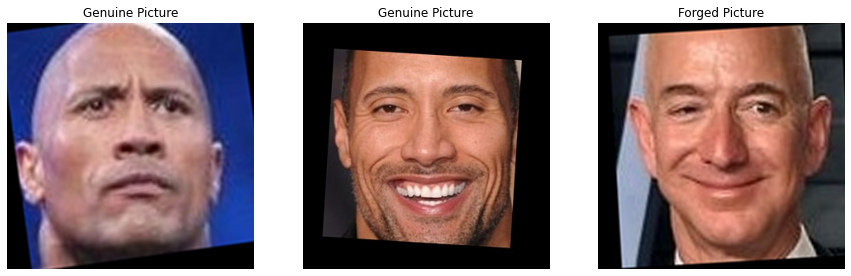

In [ ]:
DisplayPicture()

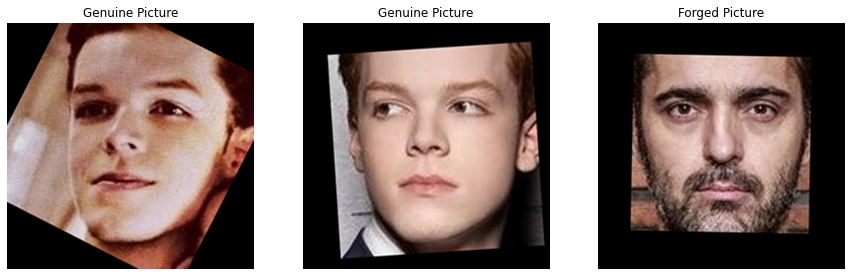

In [ ]:
DisplayPicture()

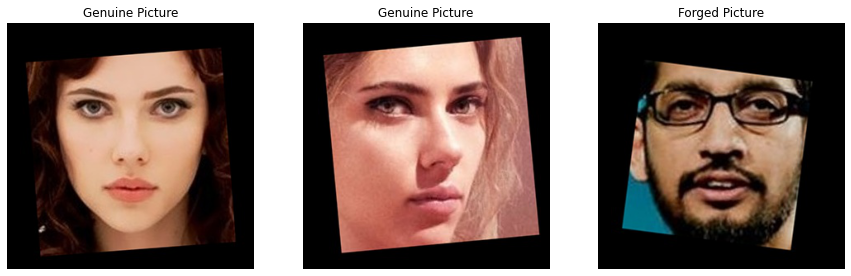

In [ ]:
DisplayPicture()

In [ ]:
# lets see number of genuine and forged pciture for each celebrity id
for i in range(1,100) :
  print(len(genuine_pict[i]),len(forged_pict[i]))

91 91
118 118
113 113
66 66
81 81
68 68
130 130
122 122
80 80
123 123
112 112
86 86
88 88
141 141
130 130
115 115
126 126
107 107
124 124
154 154
76 76
128 128
121 121
134 134
133 133
119 119
93 93
109 109
61 61
101 101
105 105
115 115
90 90
148 148
118 118
48 48
122 122
71 71
132 132
97 97
117 117
73 73
127 127
77 77
94 94
71 71
75 75
95 95
99 99
97 97
120 120
146 146
107 107
121 121
100 100
89 89
82 82
100 100
80 80
113 113
147 147
139 139
165 165
144 144
151 151
151 151
142 142
89 89
86 86
128 128
119 119
104 104
38 38
137 137
105 105
181 181
85 85
163 163
158 158
122 122
125 125
88 88
167 167
118 118
76 76
140 140
68 68
62 62
81 81
82 82
120 120
107 107
82 82
93 93
50 50
65 65
99 99
119 119
109 109


In [ ]:
# Split data set into train and test set
#The data set is huge...so lets consider only few celebrity data
train_g, test_g = genuine_pict[:8], genuine_pict[8:11]
train_f, test_f = forged_pict[:8], forged_pict[8:11]

In [ ]:
print(len(train_g),len(test_g),len(train_f),len(test_f))

8 3 8 3


In [ ]:
#Build Genuine-Genuine picture pair
def build_genuine_pairs(sig_list):
    
    pairs_list = []
    
    for person_id in range(len(sig_list)):
        for i in range(len(sig_list[person_id])-1):
            for j in range(i+1, len(sig_list[person_id])):
                pairs_list.append([sig_list[person_id][i], sig_list[person_id][j]])            
    
    return pairs_list

In [ ]:
#Training pair data set
train_g_g_pairs = build_genuine_pairs(train_g)
#Test pair dataset
test_g_g_pairs = build_genuine_pairs(test_g)

In [ ]:
len(train_g_g_pairs)

37029

In [ ]:
len(test_g_g_pairs)

18044

In [ ]:
def build_gen_forged_pairs(gen_pics, forged_pics):

    pairs_list = []

    for person_id in range(len(gen_pics)):

        #Let's pickup 12 random numbers for forged signatures
        #forged_ids = np.random.randint(0, len(forged_sigs[person_id]), 12)

        for i in range(len(gen_pics[person_id])):
            for j in range(len(forged_pics[person_id])):
                pairs_list.append([gen_pics[person_id][i], forged_pics[person_id][j]])
    
    return pairs_list

In [ ]:
#training and test pairs
train_g_f_pairs = build_gen_forged_pairs(train_g, train_f)
test_g_f_pairs = build_gen_forged_pairs(test_g, test_f)

In [ ]:
#Print number of pairs in training and test
print('Number of genuine-forged pictures in training set:', len(train_g_f_pairs))
print('Number of genuine-forged pictures in test set:', len(test_g_f_pairs))

Number of genuine-forged pictures in training set: 74811
Number of genuine-forged pictures in test set: 36413


In [ ]:
img_width,img_height  = 224 , 224

In [ ]:
def batch_generator(gen_gen_list, gen_forged_list, batch_size=16):


    while True:

        first_img_array = np.zeros((batch_size, img_height, img_width, 3))
        second_img_array = np.zeros((batch_size, img_height, img_width, 3))
        batch_labels = np.zeros((batch_size, 1))

        #Generate batch_size ids for both type of pairs
        gen_gen_pair_idx = np.random.randint(0, len(gen_gen_list), batch_size//2)
        gen_forged_pair_idx = np.random.randint(0, len(gen_forged_list), batch_size//2)

        for i in range(batch_size//2):

            #Get images from gen_gen pair
            gg_id = gen_gen_pair_idx[i]
            first_img = tf.keras.preprocessing.image.load_img(gen_gen_list[gg_id][0], target_size=(img_height, img_width))
            second_img = tf.keras.preprocessing.image.load_img(gen_gen_list[gg_id][1], target_size=(img_height, img_width))
            
            first_img_array[2*i] = tf.keras.preprocessing.image.img_to_array(first_img)
            second_img_array[2*i] = tf.keras.preprocessing.image.img_to_array(second_img)

            #Genuine genuine pair will be a given a label of '1'
            batch_labels[2*i] = 1

            #Get images from gen_forged pair
            gf_id = gen_forged_pair_idx[i]
            first_img = tf.keras.preprocessing.image.load_img(gen_forged_list[gf_id][0], target_size=(img_height, img_width))
            second_img = tf.keras.preprocessing.image.load_img(gen_forged_list[gf_id][1], target_size=(img_height, img_width))
            
            first_img_array[2*i+1] = tf.keras.preprocessing.image.img_to_array(first_img)
            second_img_array[2*i+1] = tf.keras.preprocessing.image.img_to_array(second_img)

            #Genuine genuine-forged pair will be a given a label of '0'
            batch_labels[2*i+1] = 0
        
        #Normalize data
        first_img_array = tf.keras.applications.mobilenet.preprocess_input(first_img_array)
        second_img_array = tf.keras.applications.mobilenet.preprocess_input(second_img_array)

        yield [first_img_array, second_img_array], batch_labels

In [ ]:
#test batch generator
batgen = batch_generator(train_g_g_pairs, train_g_f_pairs)

In [ ]:
batgen

<generator object batch_generator at 0x7f18d073a4d0>

In [ ]:
X, y = next(batgen)

In [ ]:
len(X)

2

In [ ]:
len(y)

16

In [ ]:
X[0].shape

(16, 224, 224, 3)

In [ ]:
X[1].shape

(16, 224, 224, 3)

In [ ]:
y.shape

(16, 1)

# Build Pre-trained Model

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(include_top=False, 
                                                      input_shape=(img_height, img_width,3),
                                                      alpha=0.25,
                                                      weights='imagenet')

2121728/2108140 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_0.25_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 8)       32        
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 8)

In [ ]:
print("Number of layers-",len(model.layers))

Number of layers- 86


In [ ]:
#freeze all but last 10 layers
for layer in model.layers[:77]:
    layer.trainable=False

In [ ]:
model.summary()

Model: "mobilenet_0.25_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 8)       32        
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 8)

Build Siamese network using mobilenet as feature generator

In [ ]:
#Create two input layers - first and second image
first_input = tf.keras.layers.Input(shape=(img_height, img_width,3))
second_input = tf.keras.layers.Input(shape=(img_height, img_width,3))

In [ ]:
first_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [ ]:
second_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
#Generate features for first and second image
first_img_features = model(first_input)
second_img_features = model(second_input)

In [ ]:
first_img_features

<KerasTensor: shape=(None, 7, 7, 256) dtype=float32 (created by layer 'mobilenet_0.25_224')>

In [ ]:
second_img_features

<KerasTensor: shape=(None, 7, 7, 256) dtype=float32 (created by layer 'mobilenet_0.25_224')>

In [ ]:
#Lets flatten the features using Average pooling
gap_layer = tf.keras.layers.GlobalAveragePooling2D()
#First img features
first_img_features = gap_layer(first_img_features)
#Second image features
second_img_features = gap_layer(second_img_features)

In [ ]:
first_img_features

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
type(first_img_features)

keras.engine.keras_tensor.KerasTensor

In [ ]:
second_img_features

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
#Distnace calculation
def euclidean_distance(features):
  
    #Get features
    x, y = features
    #Calculate distance
    distance = tf.keras.backend.sqrt(tf.keras.backend.sum(tf.keras.backend.square(x - y), axis=1, keepdims=True))  
    return distance

In [ ]:
# Define output shape of distice layer
def eucl_dist_output_shape(shapes):
    #Shapes of feature 1 and 2
    shape1, shape2 = shapes
    #Returned shape is equal to number of examples, 1
    return (shape1[0], 1)

# Distance Metrics

In [ ]:
distance = tf.keras.layers.Lambda(euclidean_distance, 
                                  output_shape=eucl_dist_output_shape)([first_img_features, second_img_features])

In [ ]:
distance

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'lambda')>

In [ ]:
model1 = tf.keras.Model([first_input, second_input], distance)

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
mobilenet_0.25_224 (Functional) (None, 7, 7, 256)    218544      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 256)          0           mobilenet_0.25_224[0][0]     

In [ ]:
#Loss function for Siamese network
def contrastive_loss(y_true, y_pred):

    """
    y_pred : Eucledean distance for each pair of images
    y_true : 1 for Genuine-genuine pair, 0 otherwise
    
    Contrastive loss from Hadsell-et-al.'06
    Source: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    
    Explanation:
    When ytrue is 1, that means the sample are duplicates of each other, 
    so the Euclidean distance (ypred) between their outputs must be minimized.
    So the loss is taken as the square of that Euclidean distance itself - square(y_pred).

    When ytrue is 0, i.e. the samples are not duplicates, then the Euclidean distance 
    between them must be maximized, at least to the margin. So the loss to be minimized
    is the difference of the margin and the Euclidean distance - (margin - y_pred).
    If the Euclidean distance (ypred) is already greater than the margin, 
    then nothing is to be learned, so the loss is made to be zero in 
    that case by saying maximum(margin - y_pred, 0).
    """

    margin = 1

    #Loss when pairs are genuine-genuine
    positive_loss = tf.keras.backend.square(y_pred)
    
    #Loss when pairs are genuine-fake
    negative_loss = tf.keras.backend.square(tf.keras.backend.maximum(margin - y_pred, 0))

    #Total loss
    total_loss = y_true * positive_loss + (1 - y_true) * negative_loss
    
    #Calculate average loss
    total_average_loss = tf.keras.backend.mean(total_loss)

    return total_average_loss

In [ ]:
model1.compile(optimizer='adam', loss=contrastive_loss)

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
mobilenet_0.25_224 (Functional) (None, 7, 7, 256)    218544      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 256)          0           mobilenet_0.25_224[0][0]     

# Model Training

In [ ]:
os.chdir('/content/drive/MyDrive/LablFiles/AdvancedVision/Project2/')

In [ ]:
#Total training and test examples
total_train_examples = len(train_g_g_pairs) + len(train_g_f_pairs)
total_test_examples = len(test_g_g_pairs) + len(test_g_f_pairs)

In [ ]:
#Create Train and Test batch generators
batch_size = 32
train_generator = batch_generator(train_g_g_pairs, train_g_f_pairs, batch_size=batch_size)
test_generator = batch_generator(test_g_g_pairs, test_g_f_pairs, batch_size=batch_size)

In [ ]:
#Model checkpoint to save the best model
model_ckpt = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/LablFiles/AdvancedVision/Project2/model1_siamese_v2.h5', 
                                                save_best_only=True, 
                                                monitor='val_loss',
                                                verbose=1)

In [ ]:
#Start training
model1.fit(train_generator,
          epochs=1,
          steps_per_epoch=total_train_examples//batch_size, 
          validation_data=test_generator, 
          validation_steps=total_test_examples//batch_size, 
          callbacks=[model_ckpt])

3495/3495 [==============================] - 2122s 597ms/step - loss: 0.9747 - val_loss: 0.4903

Epoch 00001: val_loss improved from inf to 0.49030, saving model to /content/drive/MyDrive/LablFiles/AdvancedVision/Project2/model1_siamese_v2.h5


In [ ]:
model1.save('/content/drive/MyDrive/LablFiles/AdvancedVision/Project2/model1_siamese_saved_v2.h5')

In [ ]:
#Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/LablFiles/AdvancedVision/Project2/model1_siamese_saved_v2.h5', custom_objects={'contrastive_loss':contrastive_loss})

In [ ]:
#Build predictions
predictions = []
true_labels = []

In [ ]:
for i in tqdm(range(total_test_examples//batch_size)):

    #Get batch
    X, y = next(test_generator)
    #Model predictions
    distances = model.predict(X)

    #Capture it in the labels and predictions list
    for j in range(y.shape[0]):
        true_labels.append(int(y[j][0]))
        predictions.append(distances[j][0])

100%|██████████| 1701/1701 [12:20<00:00,  2.30it/s]


In [ ]:
len(predictions), len(true_labels)

(54432, 54432)

In [ ]:
predictions[:20]

[1.4905087,
 1.0046182,
 0.40054792,
 0.97800636,
 0.48342672,
 0.50011516,
 1.1394495,
 1.3368664,
 1.3945016,
 2.116951,
 1.031463,
 0.9641119,
 0.5952317,
 1.3462346,
 0.4794618,
 1.5987607,
 0.35055408,
 1.550039,
 1.0273585,
 1.8626755]

In [ ]:
true_labels[:25]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

Threashold Calculation

In [ ]:
def compute_accuracy_thresh(predictions, labels):
    
    """
    Compute accuracy with a range of thresholds on distances.
    """

    #Get maximum and minimum value of distance for test examples
    dmax = np.max(predictions)
    dmin = np.min(predictions)
    print(dmin, dmax)

    #How many pairs are genuine-genuine and how many are genuine-forged in test data
    n_gg_pairs = np.sum(labels == 1)
    n_gf_pairs = np.sum(labels == 0)
    
    #We will increment threhold by
    step = 0.01

    #Initialize Accuracy and threshold
    max_acc = 0
    best_thresh = -1

    #Run through a look increasing threshold by step amount and checking accuracy   
    for d in np.arange(dmin, dmax+step, step):

        #Test examples for which predicted distance was less than or equal to d (threshold)
        #These can be taken as genuine-genuine pairs (for given threshold)
        idx1 = predictions.ravel() <= d
        
        #Test examples for which predicted distance > d (genuine-forged pairs)
        idx2 = predictions.ravel() > d
       
        #How many positive examples are correct
        true_positive_rate = float(np.sum(labels[idx1] == 1)) / n_gg_pairs   
        true_negative_rate = float(np.sum(labels[idx2] == 0)) / n_gf_pairs
        
        #Accuracy - avg of above two terms
        acc = (true_positive_rate + true_negative_rate)/2       

        #If accuracy improved from previous best, make a note of it
        #print('Previous Accuracy, Best threshold', max_acc, best_thresh)
        #print('Current Accuracy and Threshold', acc, d)    
        if (acc > max_acc):
            max_acc, best_thresh = acc, d
           
    return max_acc, best_thresh

In [ ]:
test_acc, threshold = compute_accuracy_thresh(np.array(predictions), np.array(true_labels))
print('Test accuracy:', round(test_acc,2))
print('Best distance threshold:', round(threshold,2))

0.16306128 4.554546
Test accuracy: 0.62
Best distance threshold: 0.83


# Prediction 

In [ ]:
def visualize_prediction(img_pairs, label):

    #Load images
    first_img = tf.keras.preprocessing.image.load_img(img_pairs[0], target_size=(img_height, img_width))
    second_img = tf.keras.preprocessing.image.load_img(img_pairs[1], target_size=(img_height, img_width))
    
    #Convert to array
    first_img_array = tf.keras.preprocessing.image.img_to_array(first_img)
    second_img_array = tf.keras.preprocessing.image.img_to_array(second_img)

    #Convert to a batch
    first_img_array = np.expand_dims(first_img_array, axis=0)
    second_img_array = np.expand_dims(second_img_array, axis=0)

    #Normalize data
    first_img_array_norm = tf.keras.applications.mobilenet.preprocess_input(first_img_array)
    second_img_array_norm = tf.keras.applications.mobilenet.preprocess_input(second_img_array)

    #Model prediction - distance
    distance = model.predict([first_img_array_norm, second_img_array_norm])
    print(distance)

    print('Actual label:', label)

    if distance <= threshold:
        print('Predicted label:', 'Genuine-Genuine')
    else:
        print('Predicted label:', 'Genuine-Fake')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(plt.imread(img_pairs[0]), cmap='gray')
    ax2.imshow(plt.imread(img_pairs[1]), cmap='gray')
    plt.show()

[[0.42470545]]
Actual label: Genuine-Genuine
Predicted label: Genuine-Genuine


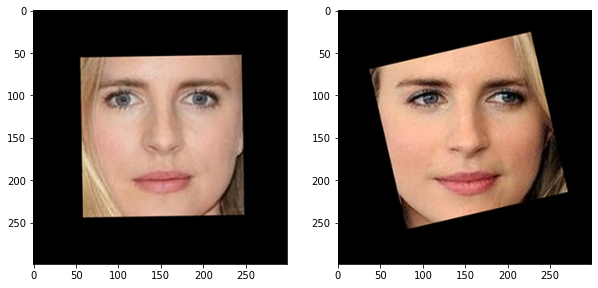

In [ ]:
#Visualize for genuine-genuine pair
idx = np.random.randint(0, len(test_g_g_pairs))
visualize_prediction(test_g_g_pairs[idx], 'Genuine-Genuine')

[[0.50474995]]
Actual label: Genuine-Genuine
Predicted label: Genuine-Genuine


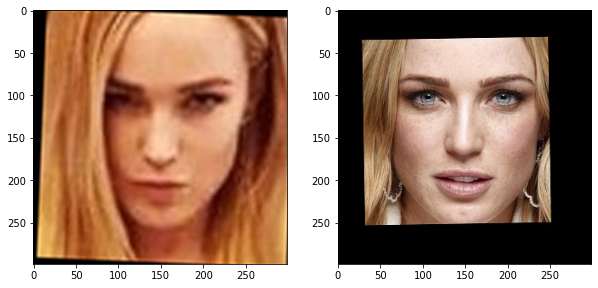

In [ ]:
#Visualize for genuine-genuine pair
idx = np.random.randint(0, len(test_g_g_pairs))
visualize_prediction(test_g_g_pairs[idx], 'Genuine-Genuine')

[[1.6403778]]
Actual label: Genuine-Genuine
Predicted label: Genuine-Fake


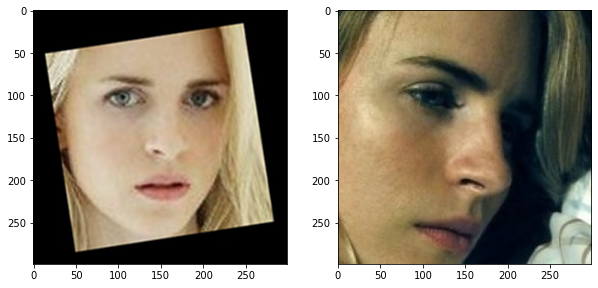

In [ ]:
#Visualize for genuine-genuine pair
idx = np.random.randint(0, len(test_g_g_pairs))
visualize_prediction(test_g_g_pairs[idx], 'Genuine-Genuine')

[[1.9198087]]
Actual label: Genuine-Genuine
Predicted label: Genuine-Fake


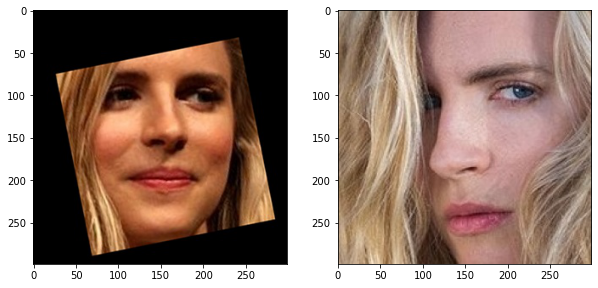

In [ ]:
#Visualize for genuine-genuine pair
idx = np.random.randint(0, len(test_g_g_pairs))
visualize_prediction(test_g_g_pairs[idx], 'Genuine-Genuine')

# Use PCA and SVM

In [ ]:
# Get list of folders in '/train' folder
basefolder ='/content/drive/My Drive/LablFiles/AdvancedVision/Project2/Files/PINS'
folderlst = [f for f in os.listdir(basefolder) if os.path.isdir(os.path.join(basefolder, f))]

In [ ]:
labels ={}

In [ ]:
i=0
labels ={}
for folder in folderlst :
  labels[folder]=i
  i=i+1

In [ ]:
labels

{'pins_Aaron Paul': 0,
 'pins_Alvaro Morte': 1,
 'pins_Amanda Crew': 2,
 'pins_Amaury Nolasco': 3,
 'pins_Anna Gunn': 4,
 'pins_Benedict Cumberbatch': 5,
 'pins_Betsy Brandt': 6,
 'pins_Brenton Thwaites': 7,
 'pins_Brit Marling': 8,
 'pins_Bryan Cranston': 9,
 'pins_Caity Lotz': 10,
 'pins_Cameron Monaghan': 11,
 'pins_Chance Perdomo': 12,
 'pins_Chris Evans': 13,
 'pins_Chris Pratt': 14,
 'pins_Cobie Smulders': 15,
 'pins_Danielle Panabaker': 16,
 'pins_Dave Franco': 17,
 'pins_Dominic Purcell': 18,
 'pins_Dwayne Johnson': 19,
 'pins_Emilia Clarke': 20,
 'pins_Emily Bett Rickards': 21,
 'pins_Emma Stone': 22,
 'pins_Gwyneth Paltrow': 23,
 'pins_Henry Cavil': 24,
 'pins_Jason Momoa': 25,
 'pins_Jeremy Renner': 26,
 'pins_Jesse Eisenberg': 27,
 'pins_Jim Parsons': 28,
 'pins_Jon Bernthal': 29,
 'pins_Josh Radnor': 30,
 'pins_Kit Harington': 31,
 'pins_Krysten Ritter': 32,
 'pins_Kumail Nanjiani': 33,
 'pins_Maisie Williams': 34,
 'pins_Mark Ruffalo': 35,
 'pins_Martin Starr': 36,
 'pins

In [ ]:
subsetfollist = folderlst[:30]

In [ ]:
len(subsetfollist)

30

In [ ]:
# Lets condier only 30 celebrities and for each celebrity condier 30 pictures only...as the data set is huge
# Iterate through each class folder in training data set and read image, resize it to 256*256 and store in ndarray
# IN this process we will create x and y data in training data set
i=0
#for folder in folderlst :
for folder in subsetfollist :
  classFolder = basefolder + '/' + folder
  files = [f for f in os.listdir(classFolder) if os.path.isfile(os.path.join(classFolder, f))]
  for fi in files[:30] : # lets condier only 30 fiels for each celebrity
    #print(fi)
    completeFilePath = classFolder + '/' + fi
    Image = tf.keras.preprocessing.image.load_img(completeFilePath)
    #Image = Image.resize((256,256))
    Image = Image.resize((299,299))
    Imagearr = tf.keras.preprocessing.image.img_to_array(Image)

    if i==0 :
      x = np.array(Imagearr, ndmin=4) #Lets define and assign value to 4-D array    
    else :
      a= np.array(Imagearr, ndmin=4)  #Lets define and assign new value 
      x = np.append(x,a,axis=0)       #Append it to existing array
    
    #y value
    if i==0 :
      y = np.array(labels[folder], ndmin=1) #Lets define and assign value to 1-D array    
    else :
      a= np.array(labels[folder], ndmin=1)  #Lets define and assign new value 
      y = np.append(y,a,axis=0)                  #Append it to existing array
    
    i=i+1

In [ ]:
print(type(x),x.shape[0])

<class 'numpy.ndarray'> 900


In [ ]:
print(type(y),y.shape[0])

<class 'numpy.ndarray'> 900


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from PIL import Image

In [ ]:
img1 = x[0].transpose(2,0,1).reshape(3,-1)

In [ ]:
from skimage import io, color

In [ ]:
img1 = tf.keras.preprocessing.image.array_to_img(x[0])

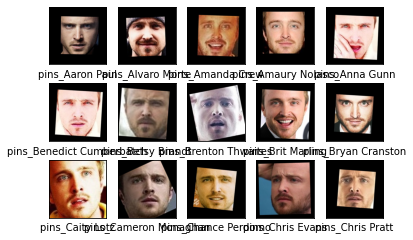

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(tf.keras.preprocessing.image.array_to_img(x[i]), cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=subsetfollist[i])

In [ ]:
pca = PCA(n_components=125, whiten=True, random_state=85)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,
                                                random_state=85)

In [ ]:
ytrain.shape

(675,)

In [ ]:
Xtrain[0].shape

(299, 299, 3)

In [ ]:
nosamples,nx,ny,d = Xtrain.shape

In [ ]:
print(nx,ny,d, nx*ny*d)

299 299 3 268203


In [ ]:
Xtrainmodi = Xtrain[0].reshape((nx*ny*d))

In [ ]:
Xtrainmodi.shape

(268203,)

In [ ]:
Xtrain_modi.shape

(675, 157323)

In [ ]:
Xtrain_modi = np.zeros((len(Xtrain),nx*ny*d))
Xtest_modi = np.zeros((len(Xtest),nx*ny*d))

In [ ]:
# Reshape Xtrain from 3 D to 1 D
for i in range(len(Xtrain)) :
  Xtrain_modi[i] = Xtrain[i].reshape((nx*ny*d))

In [ ]:
# Reshape Xtest from 3 D to 1 D
for i in range(len(Xtest)) :
  Xtest_modi[i] = Xtest[i].reshape((nx*ny*d))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain_modi, ytrain)
print(grid.best_params_)

CPU times: user 1h 10min 8s, sys: 5min 32s, total: 1h 15min 41s
Wall time: 41min 14s
{'svc__C': 50, 'svc__gamma': 0.0001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest_modi)

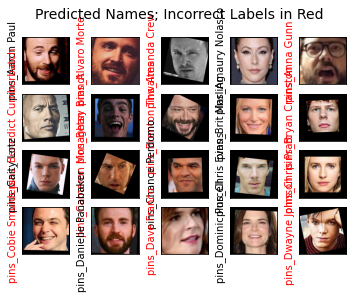

In [ ]:
fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(tf.keras.preprocessing.image.array_to_img(Xtest[i]), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(subsetfollist[i], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=subsetfollist))

                           precision    recall  f1-score   support

          pins_Aaron Paul       0.25      0.17      0.20         6
        pins_Alvaro Morte       0.15      0.25      0.19         8
         pins_Amanda Crew       0.25      0.40      0.31         5
      pins_Amaury Nolasco       0.67      0.40      0.50         5
           pins_Anna Gunn       0.56      0.62      0.59         8
pins_Benedict Cumberbatch       0.25      0.33      0.29         3
        pins_Betsy Brandt       0.62      0.62      0.62         8
    pins_Brenton Thwaites       0.18      0.38      0.24         8
        pins_Brit Marling       0.31      0.36      0.33        11
      pins_Bryan Cranston       0.40      0.44      0.42         9
          pins_Caity Lotz       0.67      0.36      0.47        11
    pins_Cameron Monaghan       0.11      0.11      0.11         9
      pins_Chance Perdomo       0.43      0.75      0.55         4
         pins_Chris Evans       0.15      0.22      0.18     